## Inference about Population Variance

s0 -> sp , s -> ss

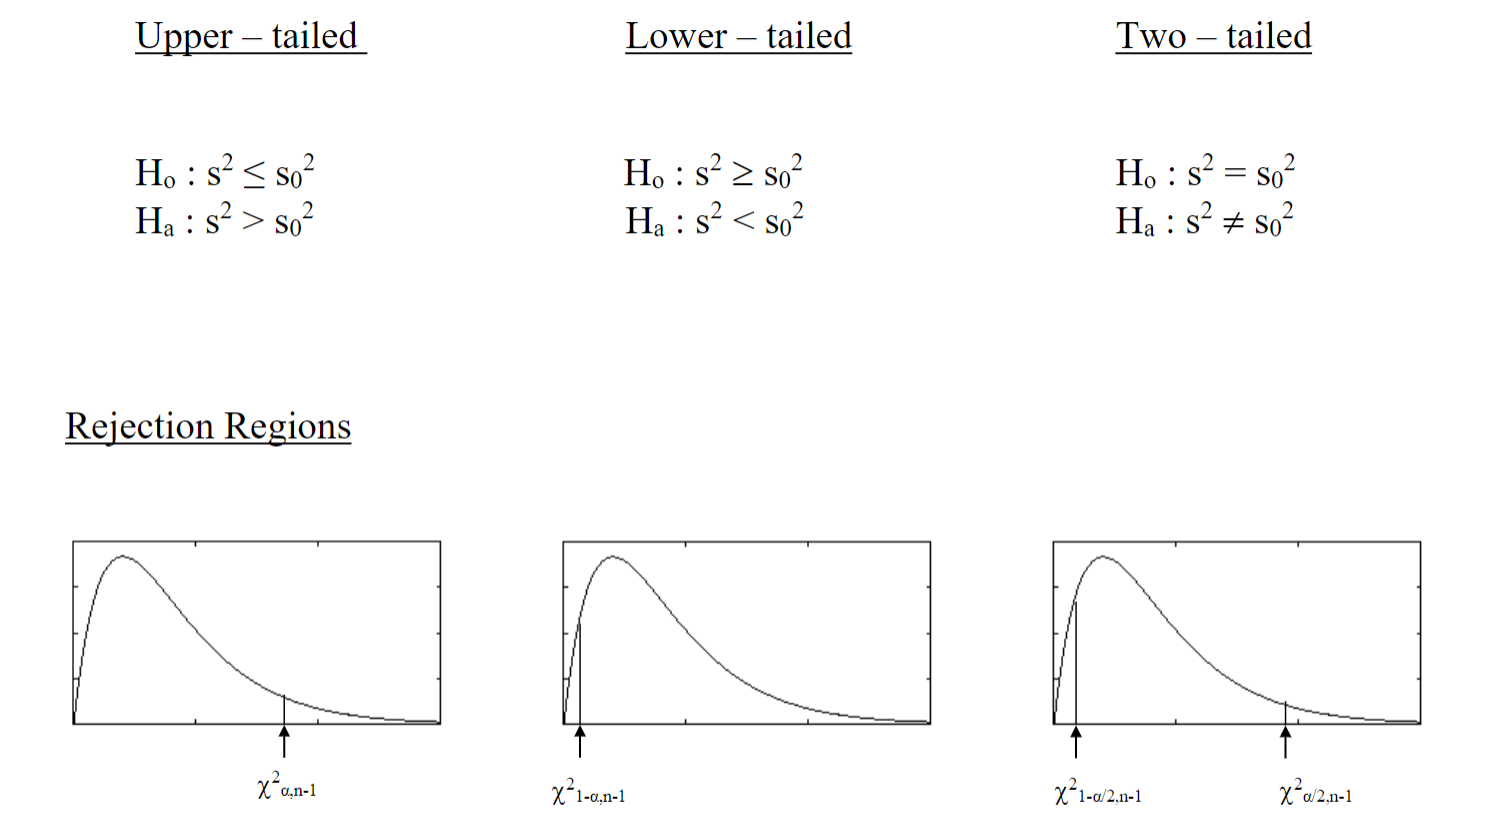

In [1]:
from scipy.stats import chisquare
import math
import scipy

In [2]:
# Chisquare value
sv = 0.21
pv = 0.25
n = 15

ss = math.sqrt(sv)
ps = math.sqrt(pv)
chi_square = ((n - 1) * ss**2) / ps ** 2 # instead can directly use sv/pv also
chi_square

11.76

In [3]:
# (1 -) Depends on lower or upper tailed, this is currently lower tailed
a = 1 - 0.05
dof = 14
scipy.stats.chi2.ppf(1 - a, dof)

6.570631383789344

### Confidence Interval

In [4]:
a = 0.1
dof = 14

In [5]:
lcl = math.sqrt(((n - 1) * ss**2) / scipy.stats.chi2.ppf((1 - a/2), dof))
hcl = math.sqrt(((n - 1) * ss**2) / scipy.stats.chi2.ppf((1 - (1 - a/2)), dof))

In [6]:
lcl, hcl

(0.35232128723677053, 0.6689137347160935)

## Inference for 2 population variances

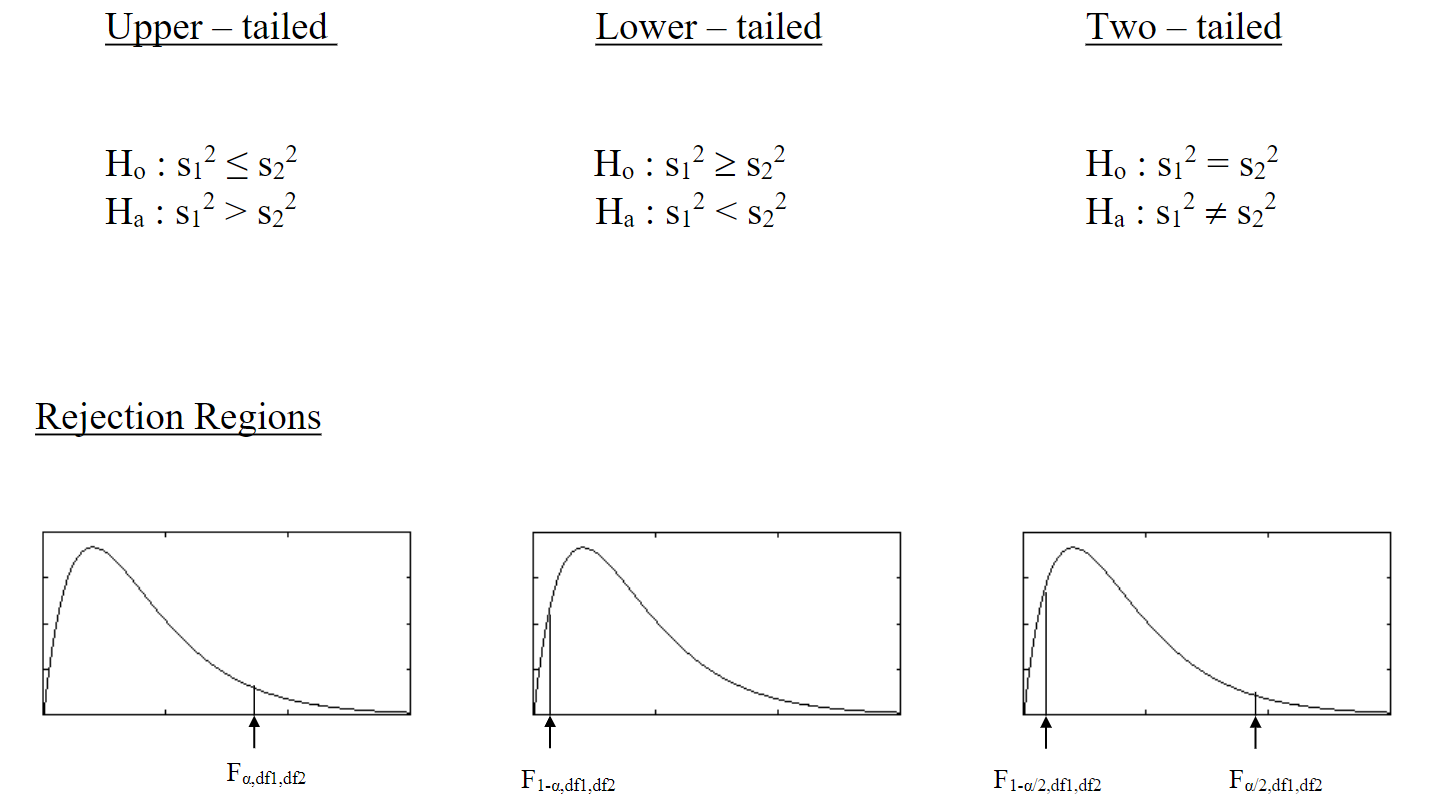

In [55]:
from scipy.stats import f
import statistics

In [49]:
a = '8.06 8.64 7.97 7.81 7.93 8.57 8.39 8.46 8.28 8.02 8.39' 
b = '7.99 8.12 8.34 8.17 8.11 8.03 8.14 8.14 7.87'

In [50]:
def to_array(a):
    val = []
    for i in a.split(' '):
        val.append(float(i))
    return val

In [51]:
a = to_array(a)
b = to_array(b)

In [77]:
va = statistics.variance(a)
vb = statistics.variance(b)
va, vb

(0.006929999999999995, 0.0041800000000000075)

In [66]:
f = va / vb  # for standard deviation it will be sa ** 2 / sa ** b
f

4.686883201710126

In [67]:
a = 0.05
dfn = 10  # 1 - length of the array
dfd = 8  # 1 - length of the array
scipy.stats.f.ppf(1 - a, dfn, dfd)

3.3471631202339784

## Hartley's Test

In [68]:
a = '81.47 331.3 82.3 65.1'
a = to_array(a)

In [70]:
fmax = max(a) / min(a)
fmax

5.089093701996928

In [ ]:
# unable to find table, refer to Table 12 in Textbook

## Levene's Test

In [71]:
a = [2.09, 2.07, 1.98, 1.88, 2.00]
b = [2.08, 1.92, 2.04, 1.96, 1.97]
c = [2.17, 2.09, 2.11, 1.97, 2.03]

In [75]:
from scipy.stats import levene
stat, p = levene(a, b, c)
p
# If p-value greater than 0.05 we reject the null hypothesis

0.920908473594479